In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Arpit Kadam\\Desktop\\US Visa Approval\\data\\EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [5]:
df.shape

(25480, 12)

In [6]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Numerical Features: \n', numerical_features, '\n', len(numerical_features))
print('Categorical Features: \n', categorical_features, '\n', len(categorical_features))

Numerical Features: 
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage'] 
 3
Categorical Features: 
 ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status'] 
 9


In [7]:
for col in df.columns:
    print(col, ':', df[col].nunique())

case_id : 25480
continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
no_of_employees : 7105
yr_of_estab : 199
region_of_employment : 5
prevailing_wage : 25454
unit_of_wage : 4
full_time_position : 2
case_status : 2


In [8]:
for col in df.columns:
    if col == "case_id":
        pass
    elif col == "no_of_employees":
        pass
    elif col == "yr_of_estab":
        pass
    elif col == "prevailing_wage":
        pass
    else:
        print(df[col].value_counts())
        print()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

has_job_experience
Y    14802
N    10678
Name: count, dtype: int64

requires_job_training
N    22525
Y     2955
Name: count, dtype: int64

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64

full_time_position
Y    22773
N     2707
Name: count, dtype: int64

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64



In [9]:
for col in df.columns:
    if col == "case_id":
        pass
    elif col == "no_of_employees":
        pass
    elif col == "yr_of_estab":
        pass
    elif col == "prevailing_wage":
        pass
    else:
        print(df[col].value_counts(normalize=True) * 100)
        print()

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64

education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64

has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64

requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64

region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64

unit_of_wage
Year     90.117739
Hour      8.465463
Week      1.067504
Month     0.349294
Name: proportion, dtype: float64

full_time_position
Y    89.375981
N    10.624019
Name: proportion, dtype: float64

case_status
Certified    66.789639
Denied       33.210361
Name: proportion, dtype: float64



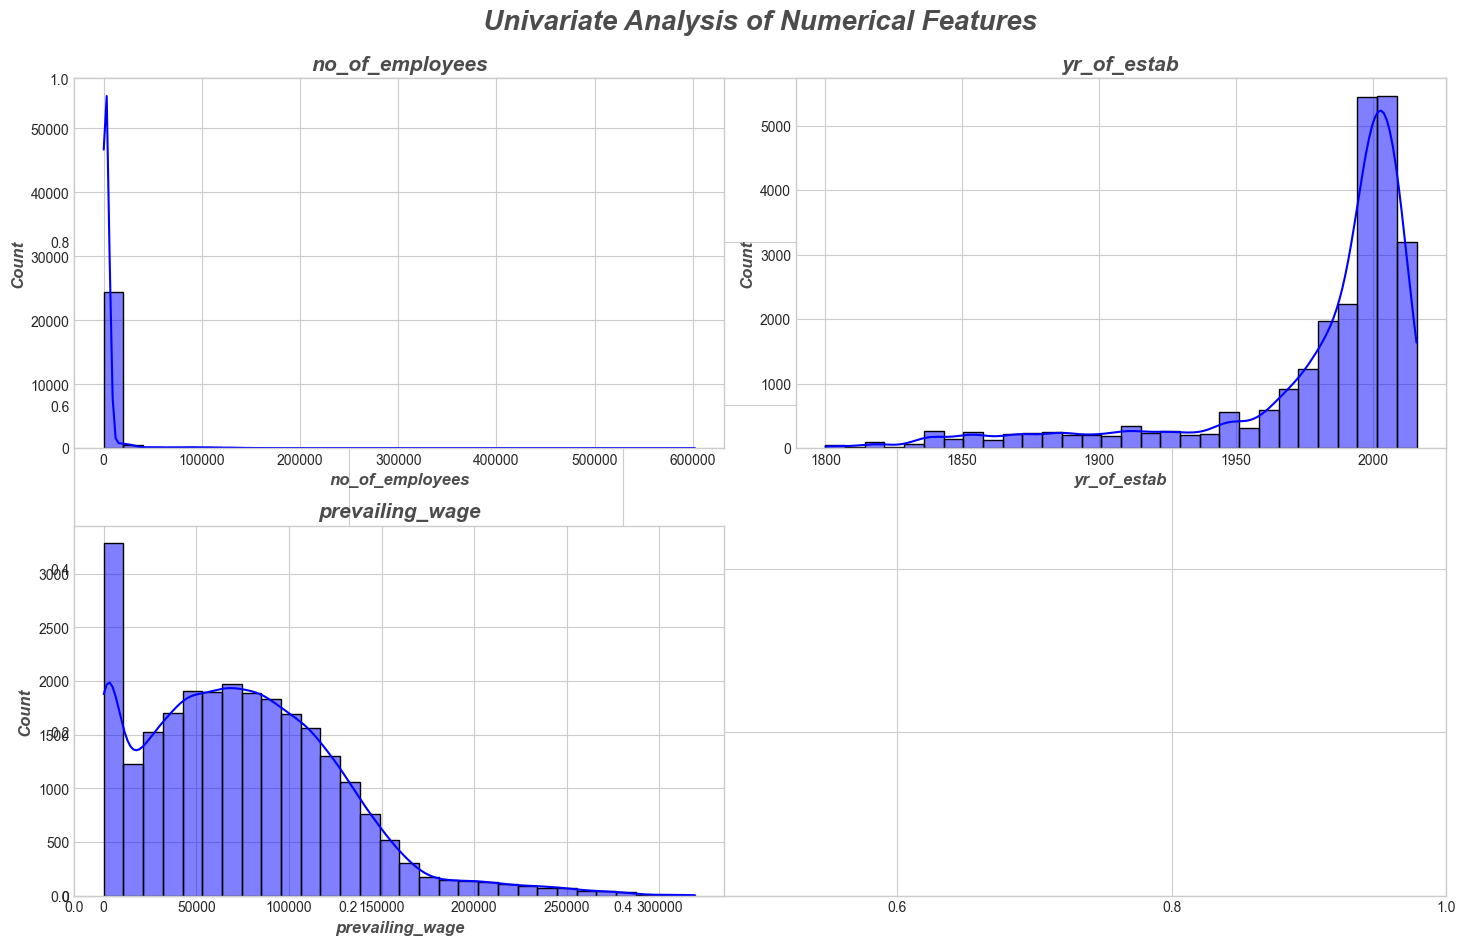

In [10]:
plt.figure(figsize=(15, 10))
plt.title("Univariate Analysis of Numerical Features", 
            fontsize=20, fontweight='bold', color='black', 
            loc='center', alpha=0.7, style='italic', y=1.05)

for i in range(0, len(numerical_features)):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[numerical_features[i]], kde=True, color='blue', bins=30)
    plt.title(numerical_features[i], fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
    plt.xlabel(numerical_features[i], fontsize=12, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
    plt.ylabel('Count', fontsize=12, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
    plt.tight_layout()
plt.savefig("visualization_images\\Univariate Analysis of Numerical Features.png")
plt.show()

In [11]:
diecrete_features = [feature for feature in numerical_features if len(df[feature].unique()) <= 25]
continuous_features = [feature for feature in numerical_features if feature not in diecrete_features]

print('Diecrete Features: ', diecrete_features, '\n length', len(diecrete_features))
print('Continuous Features: \n', continuous_features, '\n length', len(continuous_features))

Diecrete Features:  [] 
 length 0
Continuous Features: 
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage'] 
 length 3


In [12]:
from scipy.stats import chi2_contingency

chi2_test = []

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df[feature], df['case_status']))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')

result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Categorical Features', 'Hypothesis']
result

,Categorical Features,Hypothesis
0,case_id,Fail to Reject Null Hypothesis
1,continent,Reject Null Hypothesis
2,education_of_employee,Reject Null Hypothesis
3,has_job_experience,Reject Null Hypothesis
4,requires_job_training,Fail to Reject Null Hypothesis
5,region_of_employment,Reject Null Hypothesis
6,unit_of_wage,Reject Null Hypothesis
7,full_time_position,Reject Null Hypothesis
8,case_status,Reject Null Hypothesis


In [13]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [14]:
continuous_features = [feature for feature in numerical_features if len(df[feature].unique()) >= 10]

print('Continuous Features: \n', continuous_features, '\n length', len(continuous_features))

Continuous Features: 
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage'] 
 length 3


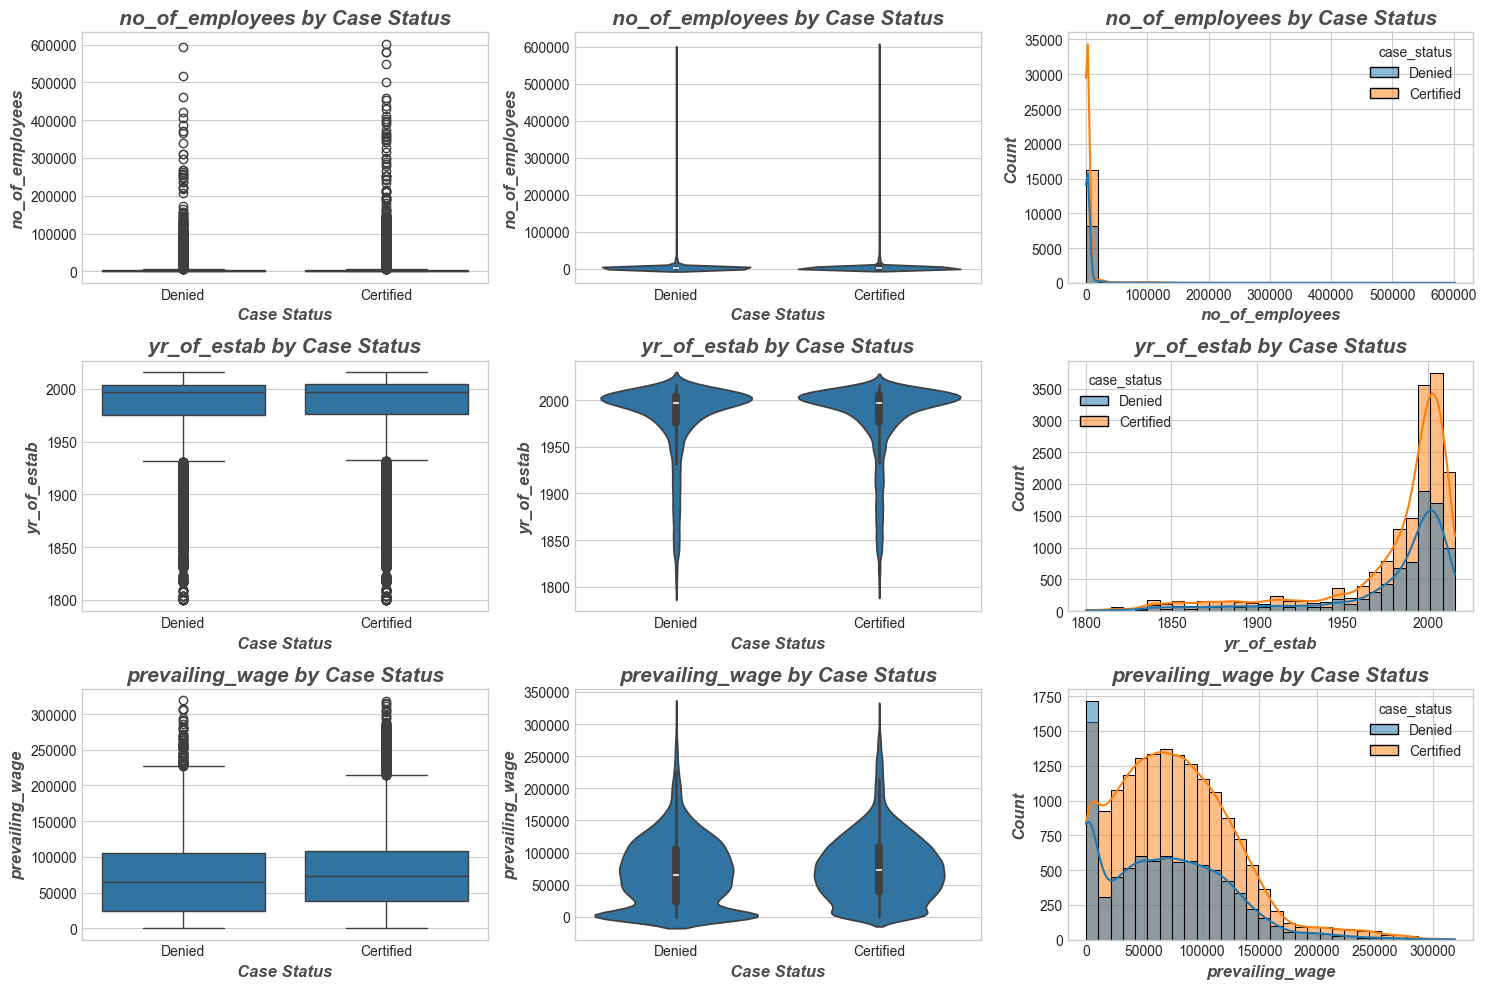

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
plt.title("Distribution of Numerical Features by Case Status", 
            color='black', fontsize=20, fontweight='bold', 
            loc='center', alpha=0.7, style='italic', y=1.05)

for i, col in enumerate(continuous_features):
    sns.boxplot(x='case_status', y=col, data=df, ax=ax[i, 0])
    sns.violinplot(x='case_status', y=col, data=df, ax=ax[i, 1])
    sns.histplot(data=df, x=col, hue='case_status', kde=True, color='blue', bins=30, ax=ax[i, 2])
    ax[i, 0].set_title(f'{col} by Case Status', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
    ax[i, 1].set_title(f'{col} by Case Status', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
    ax[i, 2].set_title(f'{col} by Case Status', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')

    ax[i, 0].set_xlabel('Case Status', fontsize=12, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
    ax[i, 1].set_xlabel('Case Status', fontsize=12, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
    ax[i, 2].set_xlabel(col, fontsize=12, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')

    ax[i, 0].set_ylabel(col, fontsize=12, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
    ax[i, 1].set_ylabel(col, fontsize=12, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
    ax[i, 2].set_ylabel('Count', fontsize=12, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
    
plt.tight_layout()
plt.savefig("visualization_images\\Distribution of Numerical Features by Case Status.png")
plt.show()

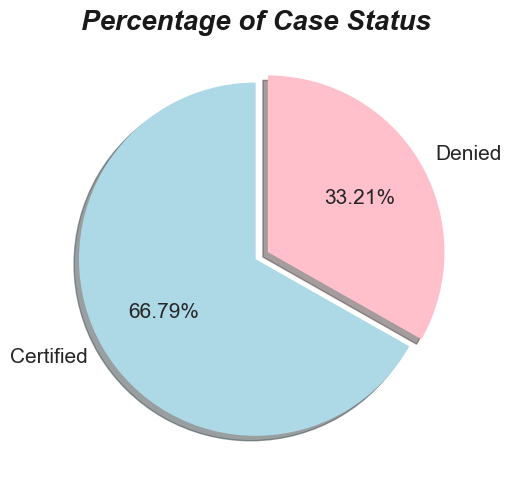

In [31]:
percentages = df.case_status.value_counts(normalize=True) * 100
labels = ['Certified', 'Denied']

fig, ax = plt.subplots(figsize=(15, 5))
explode = (0, 0.08)
colors = ['lightblue','pink']
ax.pie(percentages, labels=labels, autopct='%1.2f%%', startangle=90, explode=explode, colors=colors, shadow=True, textprops={'fontsize': 15})
plt.title('Percentage of Case Status', fontsize=20, fontweight='bold', color='black', loc='center', alpha=0.9, style='italic')
plt.tight_layout()
plt.savefig("visualization_images\\Pie Percentage of Case Status.png")
plt.show()

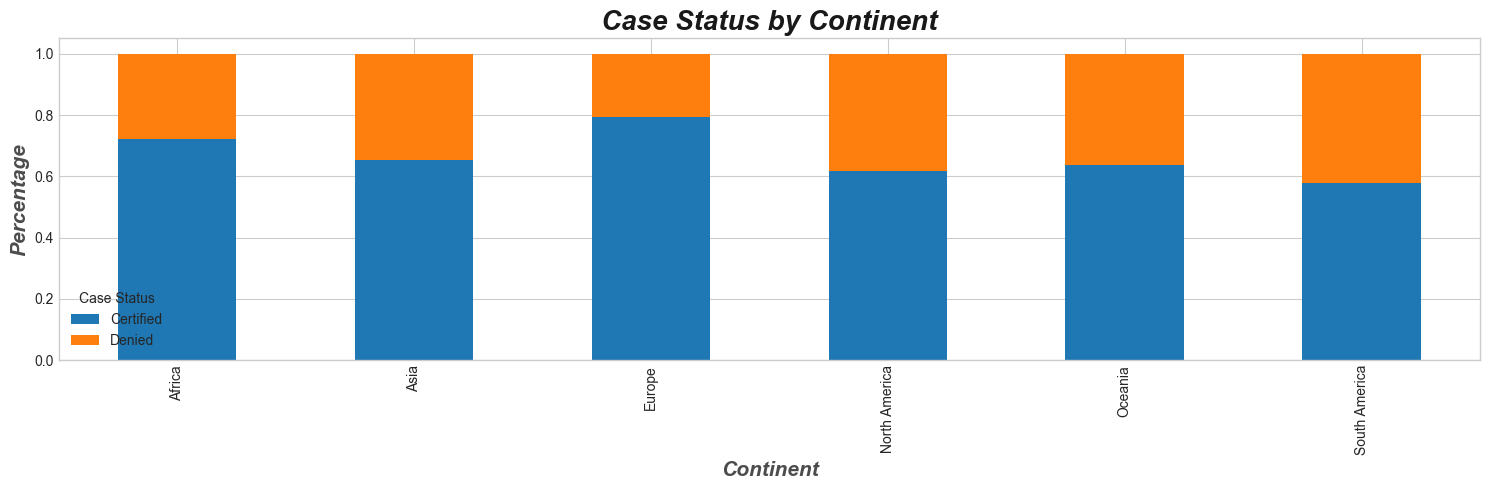

In [44]:
ax = df.groupby('continent').case_status.value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(15, 5))
ax.legend(loc='lower left', title='Case Status')
plt.title('Case Status by Continent', fontsize=20, fontweight='bold', color='black', loc='center', alpha=0.9, style='italic')
plt.xlabel('Continent', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.ylabel('Percentage', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.tight_layout()
plt.savefig("visualization_images\\Case Status by Continent.png")
plt.show()

In [47]:
df.groupby('continent').case_status.value_counts(normalize=True).to_frame() * 100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

In [48]:
df.groupby('education_of_employee').case_status.value_counts(normalize=True).to_frame() * 100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

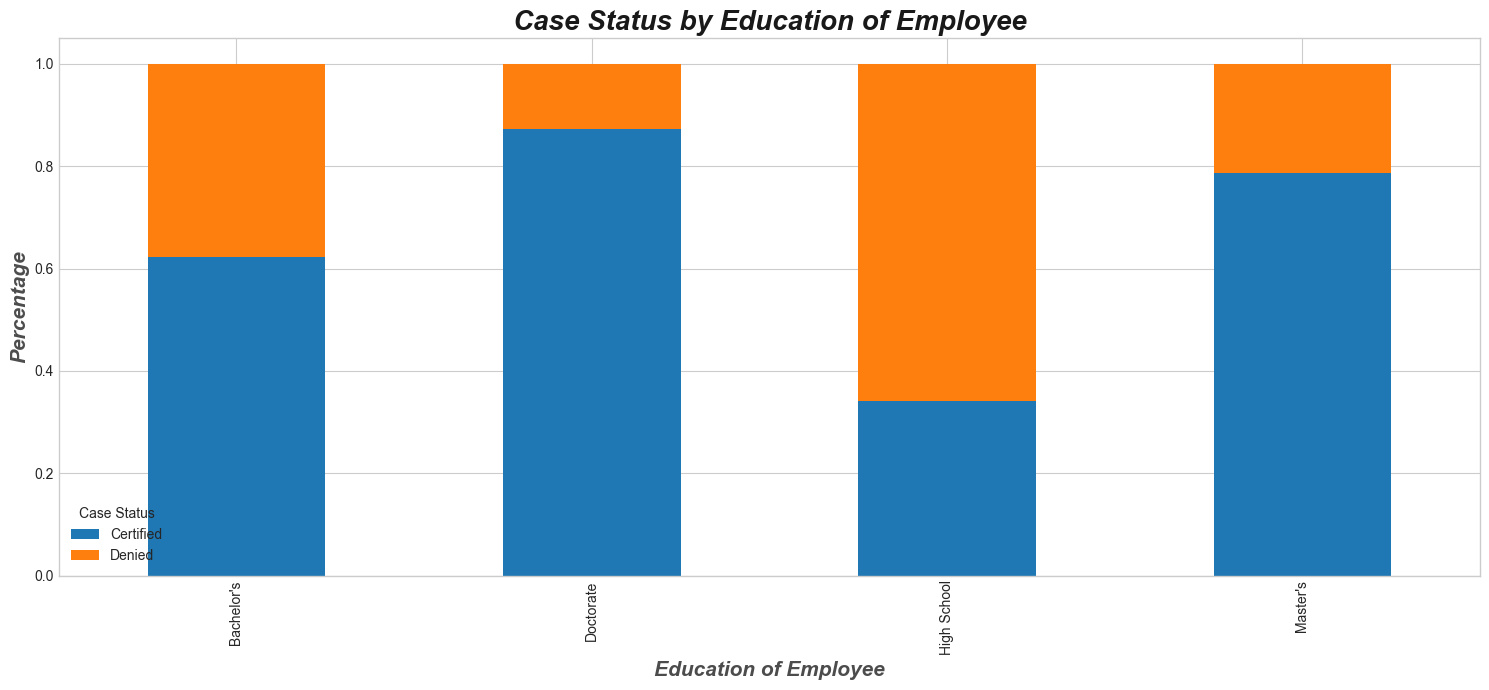

In [53]:
ax = df.groupby('education_of_employee').case_status.value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(15, 7))
ax.legend(loc='lower left', title='Case Status')
plt.title('Case Status by Education of Employee', fontsize=20, fontweight='bold', color='black', loc='center', alpha=0.9, style='italic')
plt.xlabel('Education of Employee', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.ylabel('Percentage', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.tight_layout()
plt.savefig("visualization_images\\Case Status by Education of Employee.png")
plt.show()

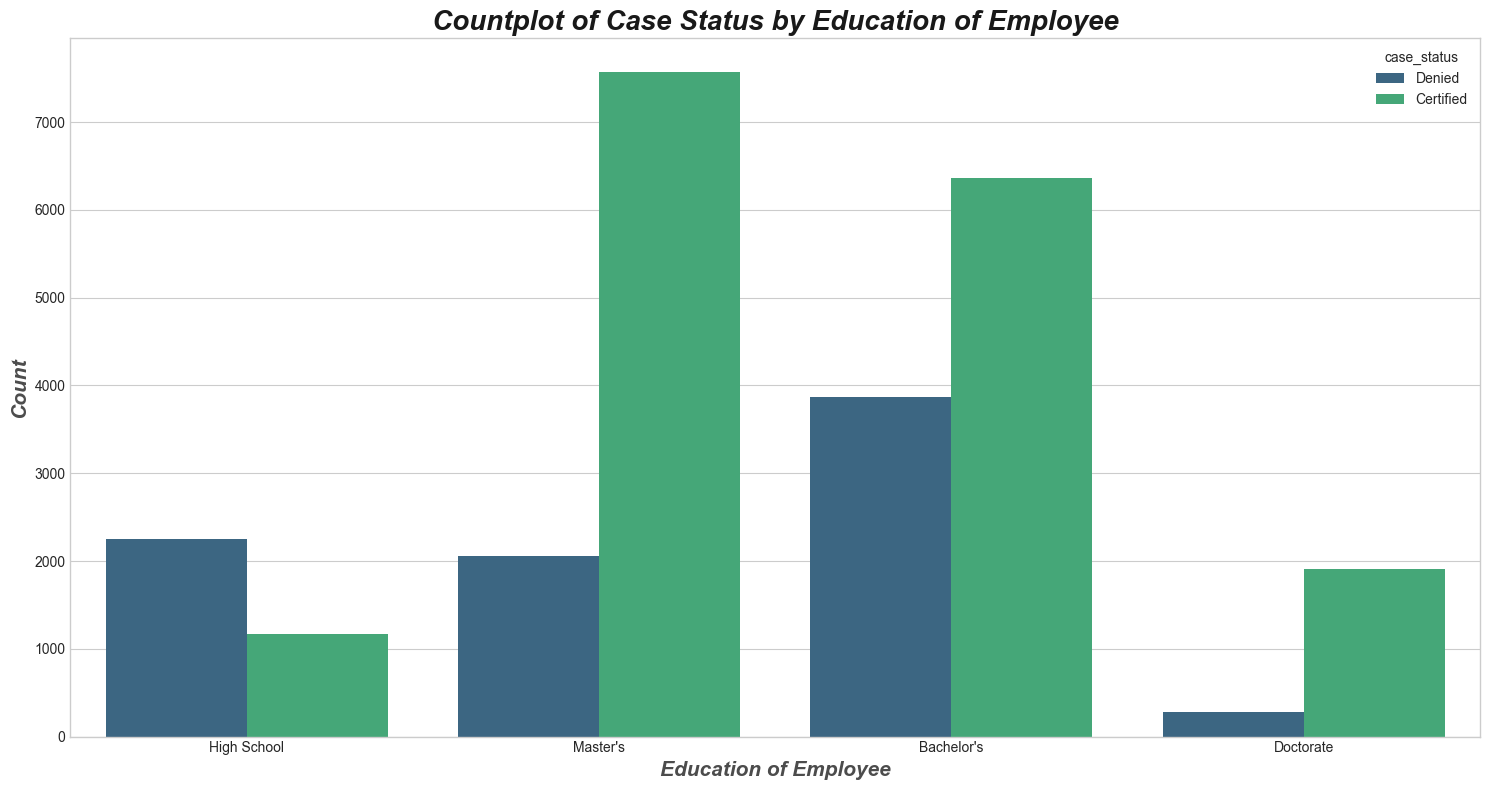

In [55]:
plt.subplots(figsize=(15, 8))
sns.countplot(x='education_of_employee', hue='case_status', data=df, palette='viridis')
plt.title('Countplot of Case Status by Education of Employee', fontsize=20, fontweight='bold', color='black', loc='center', alpha=0.9, style='italic')
plt.xlabel('Education of Employee', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.ylabel('Count', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.tight_layout()
plt.savefig("visualization_images\\Countplot of Case Status by Education of Employee.png")
plt.show()

In [56]:
df.groupby('has_job_experience').case_status.value_counts(normalize=True).to_frame() * 100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

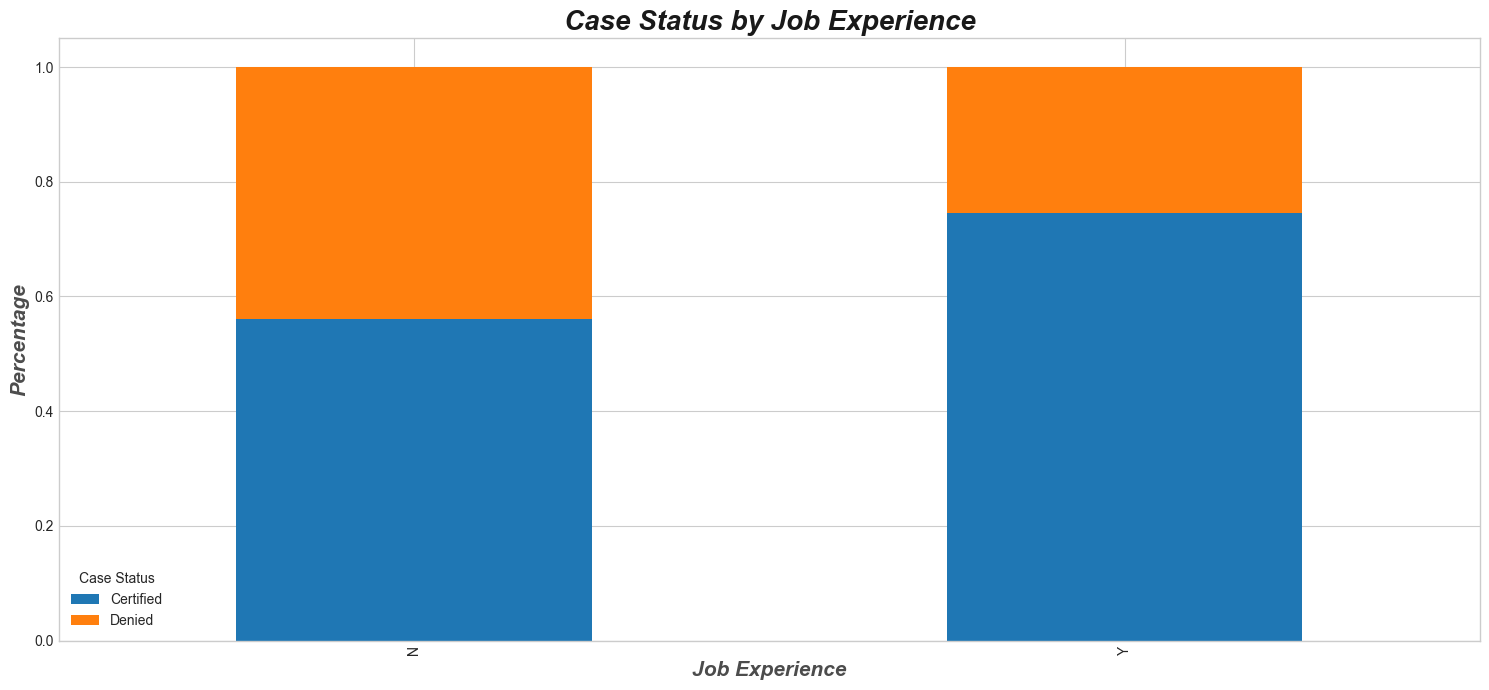

In [57]:
ax = df.groupby('has_job_experience').case_status.value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(15, 7))
ax.legend(loc='lower left', title='Case Status')
plt.title('Case Status by Job Experience', fontsize=20, fontweight='bold', color='black', loc='center', alpha=0.9, style='italic')
plt.xlabel('Job Experience', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.ylabel('Percentage', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.tight_layout()
plt.savefig("visualization_images\\Case Status by Job Experience.png")
plt.show()

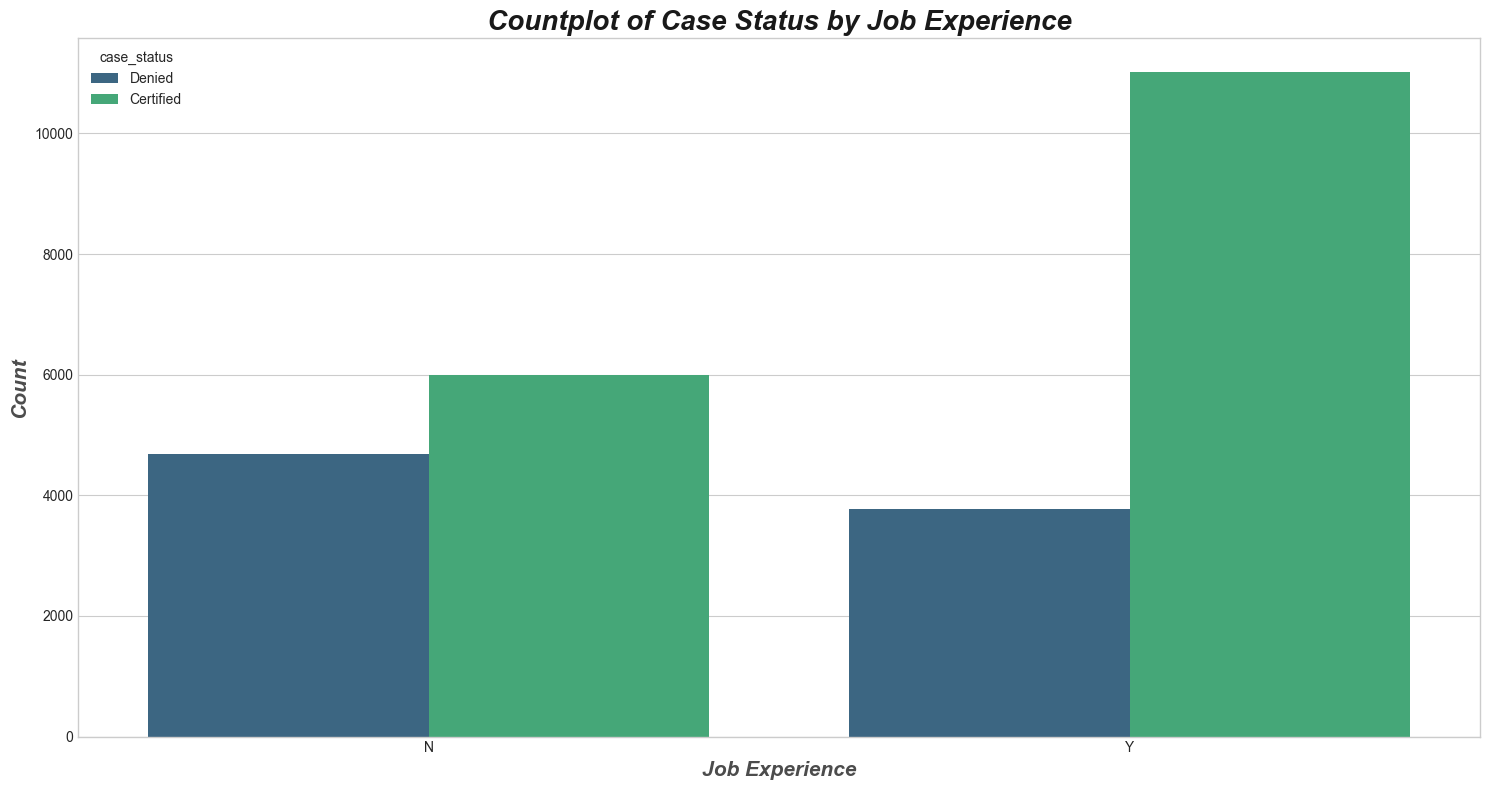

In [58]:
plt.subplots(figsize=(15, 8))
sns.countplot(x='has_job_experience', hue='case_status', data=df, palette='viridis')
plt.title('Countplot of Case Status by Job Experience', fontsize=20, fontweight='bold', color='black', loc='center', alpha=0.9, style='italic')
plt.xlabel('Job Experience', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.ylabel('Count', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.tight_layout()
plt.savefig("visualization_images\\Countplot of Case Status by Job Experience.png")
plt.show()

In [59]:
df.groupby('requires_job_training').case_status.value_counts(normalize=True).to_frame() * 100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

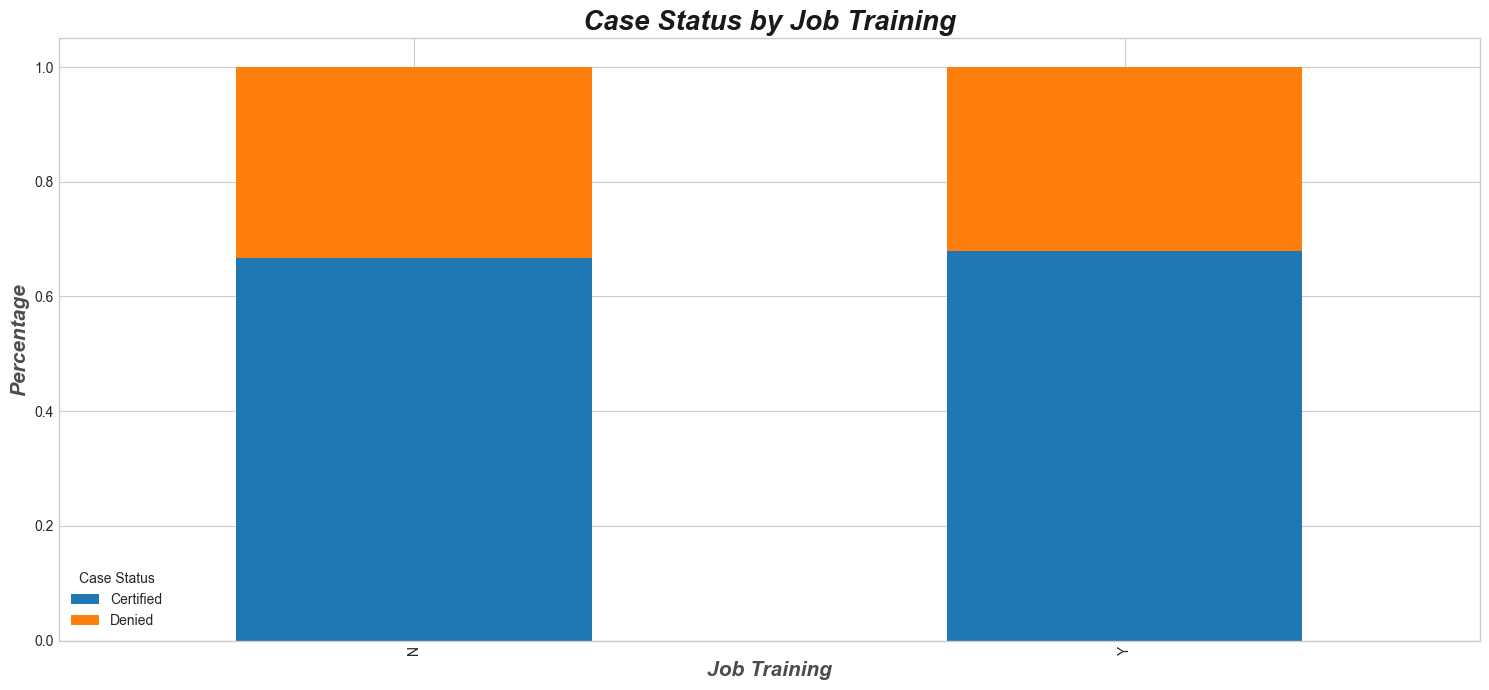

In [60]:
ax = df.groupby('requires_job_training').case_status.value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(15, 7))
ax.legend(loc='lower left', title='Case Status')
plt.title('Case Status by Job Training', fontsize=20, fontweight='bold', color='black', loc='center', alpha=0.9, style='italic')
plt.xlabel('Job Training', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.ylabel('Percentage', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.tight_layout()
plt.savefig("visualization_images\\Case Status by Job Training.png")
plt.show()

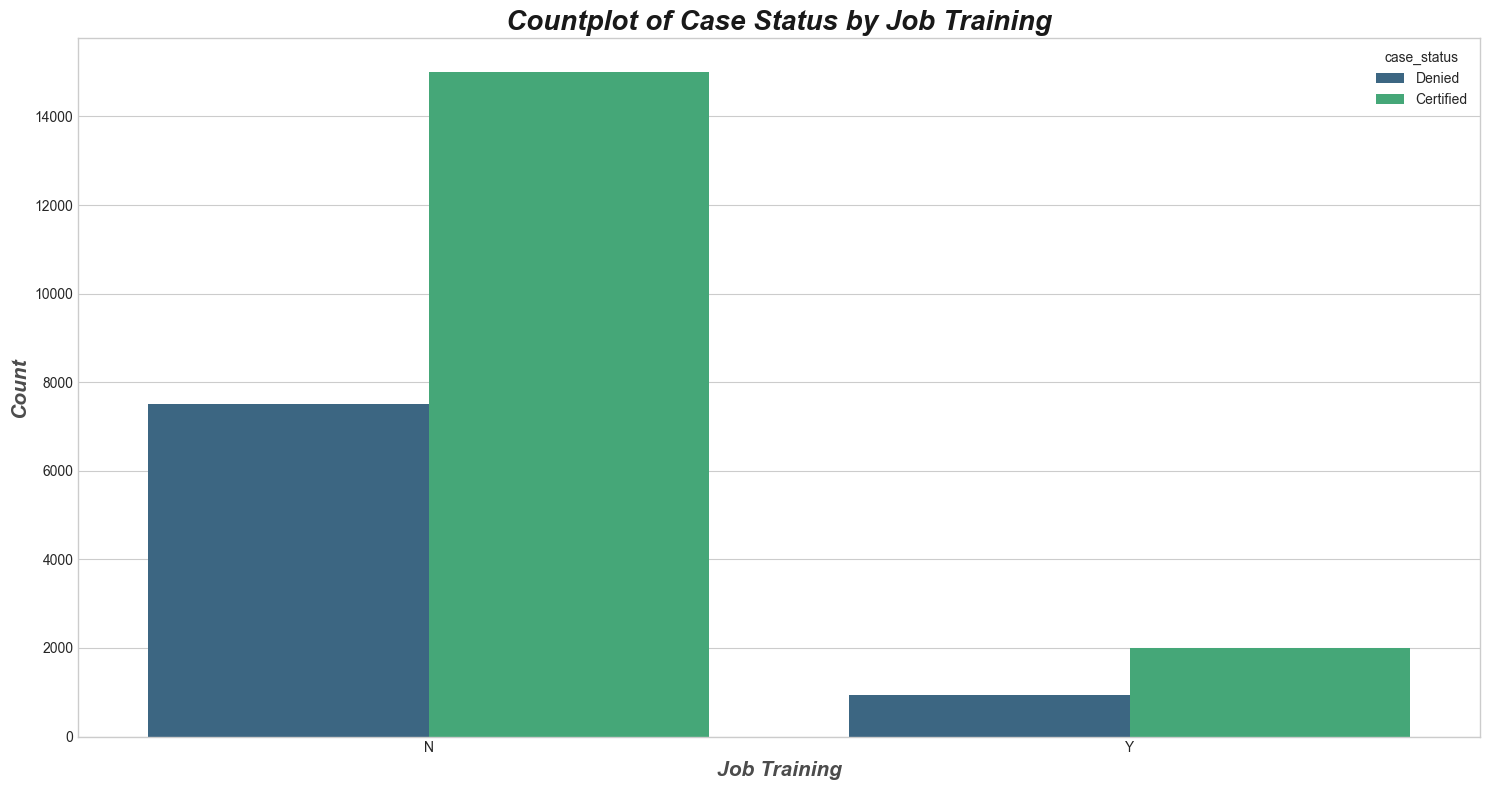

In [61]:
plt.subplots(figsize=(15, 8))
sns.countplot(x='requires_job_training', hue='case_status', data=df, palette='viridis')
plt.title('Countplot of Case Status by Job Training', fontsize=20, fontweight='bold', color='black', loc='center', alpha=0.9, style='italic')
plt.xlabel('Job Training', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.ylabel('Count', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.tight_layout()
plt.savefig("visualization_images\\Countplot of Case Status by Job Training.png")
plt.show()

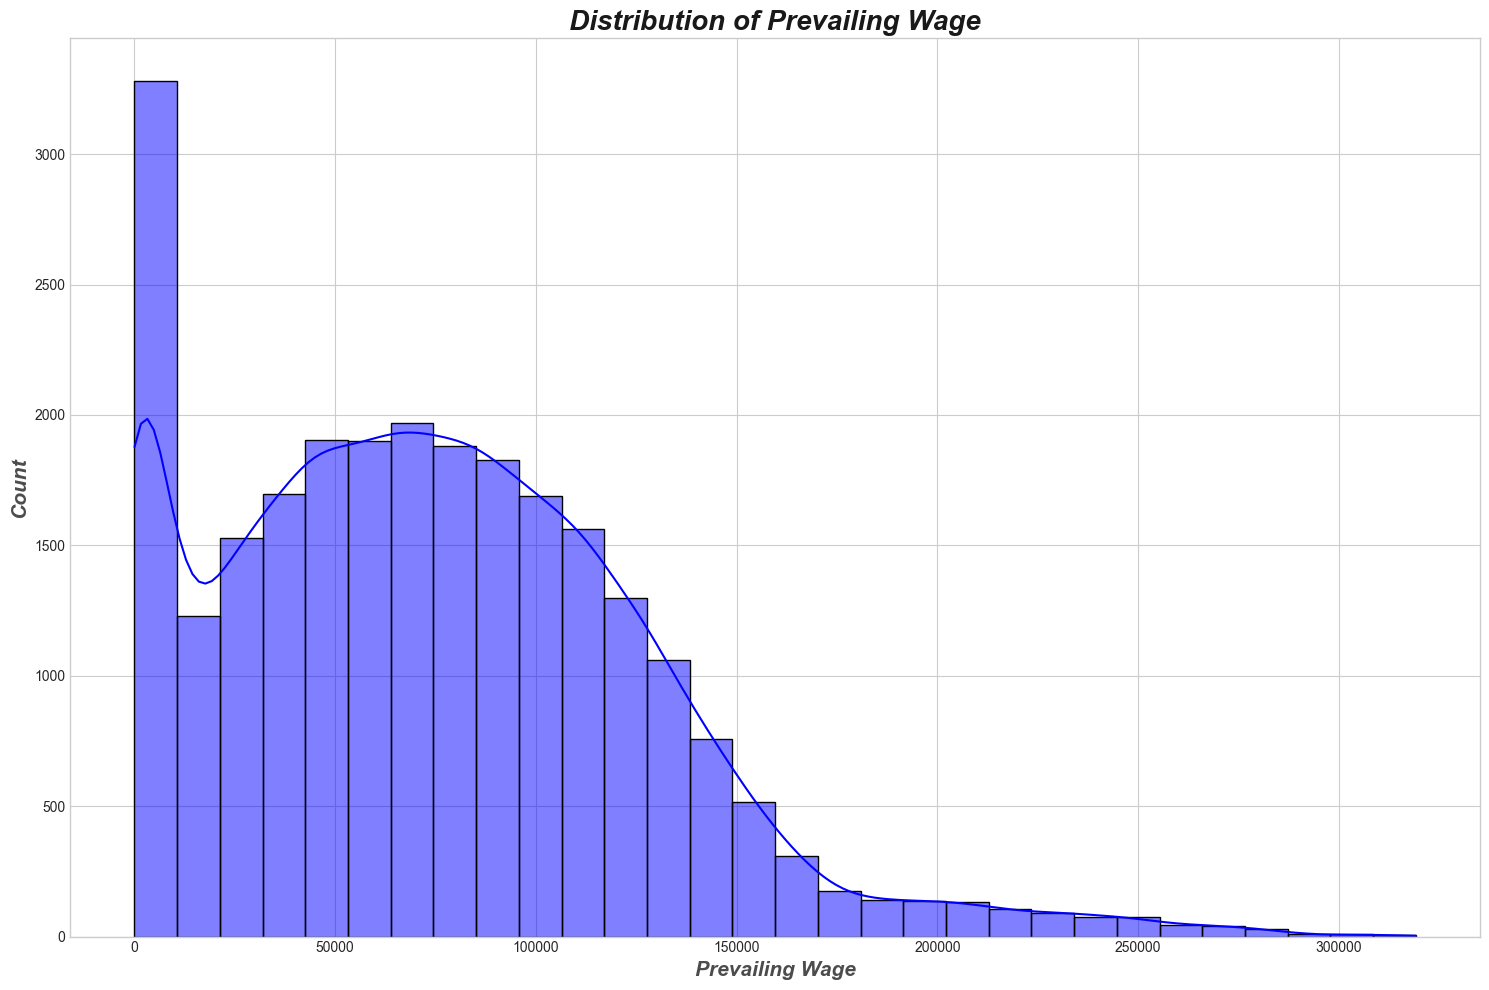

In [62]:
plt.figure(figsize=(15, 10))
sns.histplot(df['prevailing_wage'], kde=True, color='blue', bins=30)
plt.title('Distribution of Prevailing Wage', fontsize=20, fontweight='bold', color='black', loc='center', alpha=0.9, style='italic')
plt.xlabel('Prevailing Wage', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.ylabel('Count', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.tight_layout()
plt.savefig("visualization_images\\Distribution of Prevailing Wage.png")
plt.show()

In [67]:
df.groupby('education_of_employee').prevailing_wage.mean().sort_values(ascending=False).to_frame()

,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


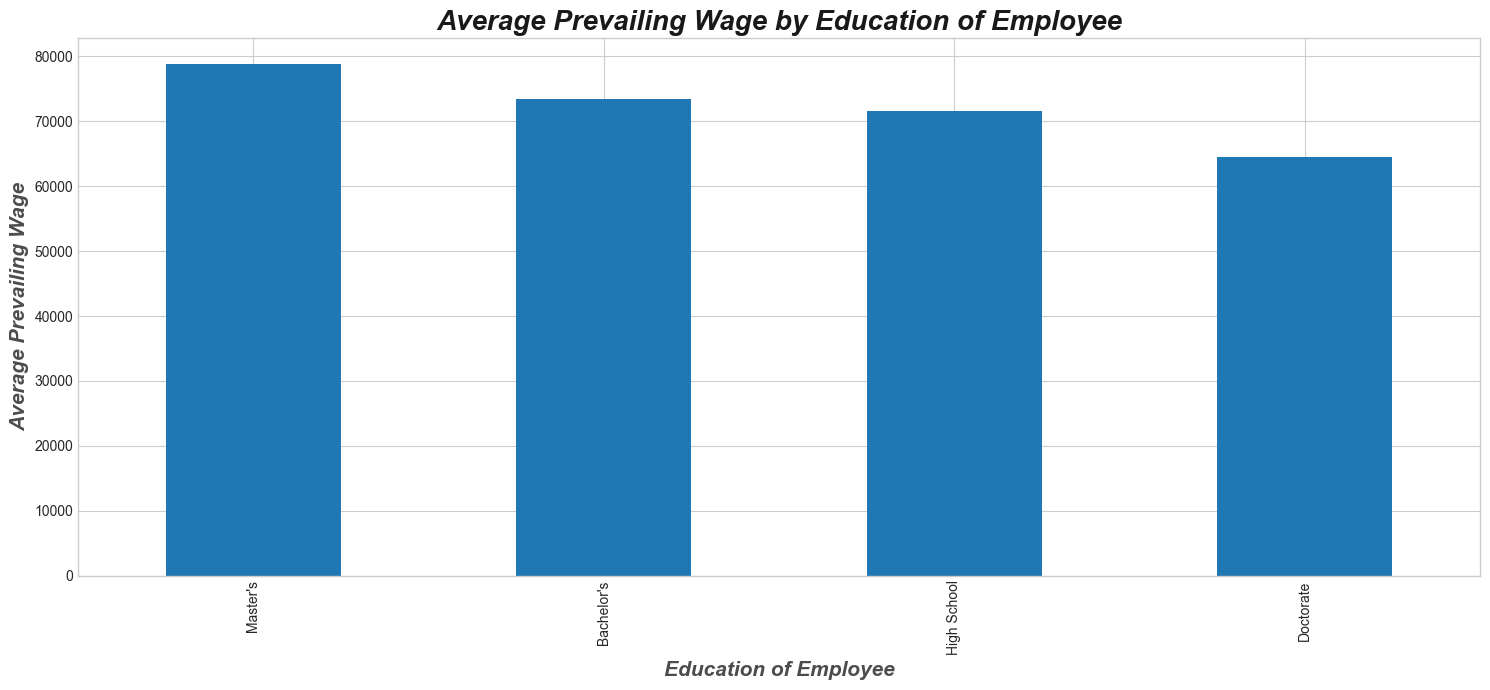

In [69]:
ax = df.groupby('education_of_employee').prevailing_wage.mean().sort_values(ascending=False).plot(kind='bar', figsize=(15, 7))
plt.title('Average Prevailing Wage by Education of Employee', fontsize=20, fontweight='bold', color='black', loc='center', alpha=0.9, style='italic')
plt.xlabel('Education of Employee', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.ylabel('Average Prevailing Wage', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.tight_layout()
plt.savefig("visualization_images\\Average Prevailing Wage by Education of Employee.png")
plt.show()

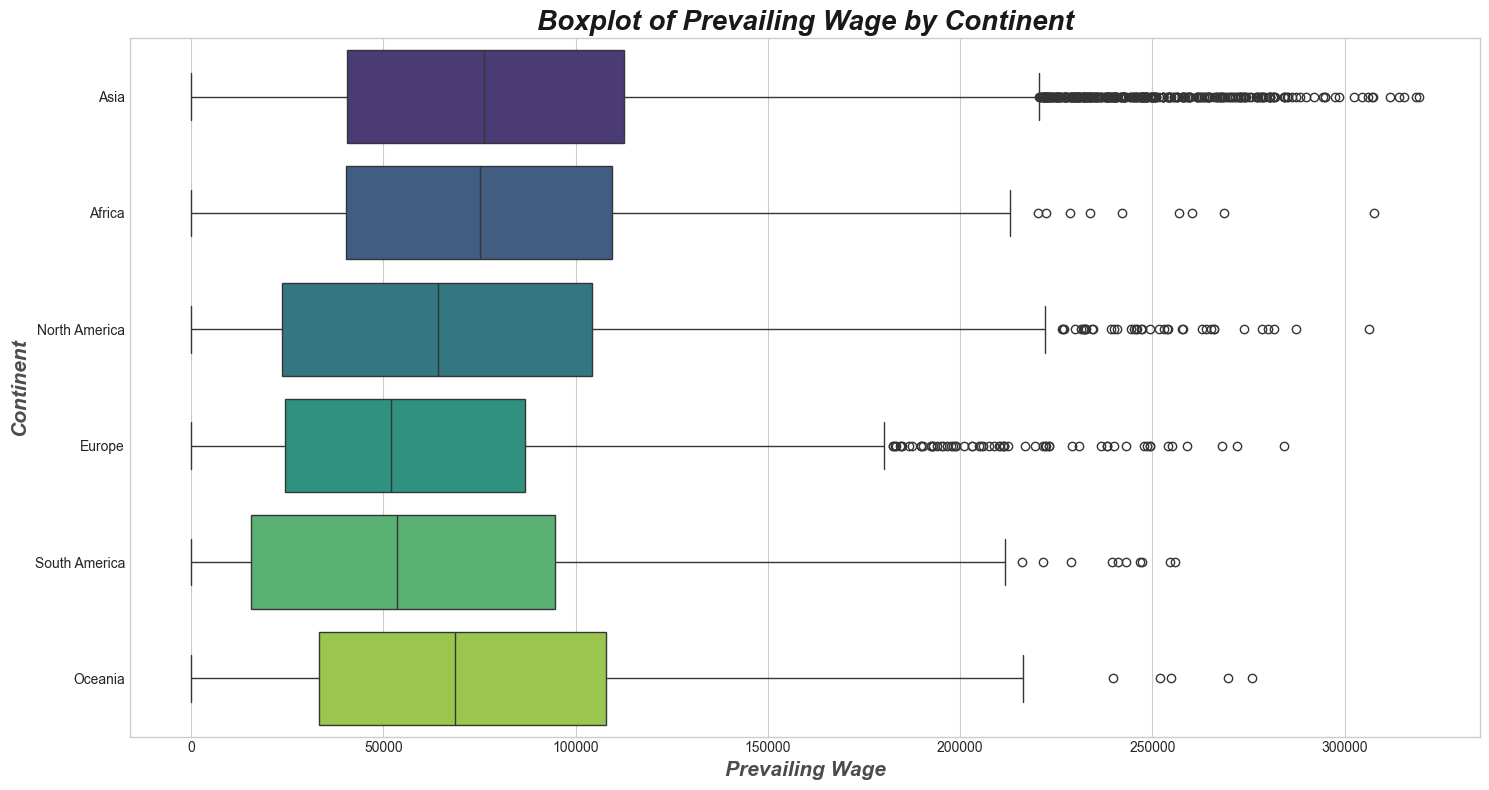

In [70]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x = "prevailing_wage", y = "continent", data = df, palette='viridis')
plt.title('Boxplot of Prevailing Wage by Continent', fontsize=20, fontweight='bold', color='black', loc='center', alpha=0.9, style='italic')
plt.xlabel('Prevailing Wage', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.ylabel('Continent', fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
plt.tight_layout()
plt.savefig("visualization_images\\Boxplot of Prevailing Wage by Continent.png")
plt.show()

In [72]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [74]:
df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

# Final Report 

- `case_id` columns can be dropped
- `requires_job_training` columns can be dropped as it has no effect on the outcome, proved in visualization and chi2 test
- `no_of_employees` and `'prevailing_wage` have outliers which needs to be handled
- `continent` has 6 unique values with value count as 

    - Asia             16861
    - Europe            3732
    - North America     3292
    - South America      852
    - Africa             551
    - Oceania            192

so lesser ones, can be made as others

- `case_status` column (target column) is imbalanced, which can be taken care of using smote

In [76]:
df.drop('case_id', axis=1, inplace=True)

In [77]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [78]:
from datetime import date

current_year = date.today().year
df['company_age'] = current_year - df['yr_of_estab']

In [80]:
df.drop('yr_of_estab', axis=1, inplace=True)

In [81]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20


In [83]:
df.shape

(25480, 11)

In [84]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

diecrete_features = [feature for feature in numerical_features if len(df[feature].unique()) <= 25]
continuous_features = [feature for feature in numerical_features if feature not in diecrete_features]

print('Numerical Features: \n', numerical_features, '\n', len(numerical_features))
print()
print('Categorical Features: \n', categorical_features, '\n', len(categorical_features))
print()
print('Diecrete Features: ', diecrete_features, '\n length', len(diecrete_features))
print()
print('Continuous Features: \n', continuous_features, '\n length', len(continuous_features))

Numerical Features: 
 ['no_of_employees', 'prevailing_wage', 'company_age'] 
 3

Categorical Features: 
 ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status'] 
 8

Diecrete Features:  [] 
 length 0

Continuous Features: 
 ['no_of_employees', 'prevailing_wage', 'company_age'] 
 length 3


In [143]:
x = df.drop('case_status', axis=1)
y = df['case_status']

print(x.shape)
print(y.shape)

(25480, 10)
(25480,)


In [99]:
y.value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [100]:
y = y.map({'Certified': 1, 'Denied': 0}).astype(int)

In [101]:
y.value_counts()

case_status
1    17018
0     8462
Name: count, dtype: int64

In [102]:
x[continuous_features].head()

,no_of_employees,prevailing_wage,company_age
0,14513,592.2029,18
1,2412,83425.6500,23
2,44444,122996.8600,17
3,98,83434.0300,128
4,1082,149907.3900,20


In [103]:
x[continuous_features].skew(axis=0, skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

In [104]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
columns = ['company_age', 'no_of_employees']
x_copy = pt.fit_transform(x[columns])
x_copy = pd.DataFrame(x_copy, columns=columns)

In [105]:
x_copy.head()

,company_age,no_of_employees
0,-0.955551,1.517300
1,-0.467001,0.030912
2,-1.078363,2.885076
3,1.630914,-1.343550
4,-0.738126,-0.432287


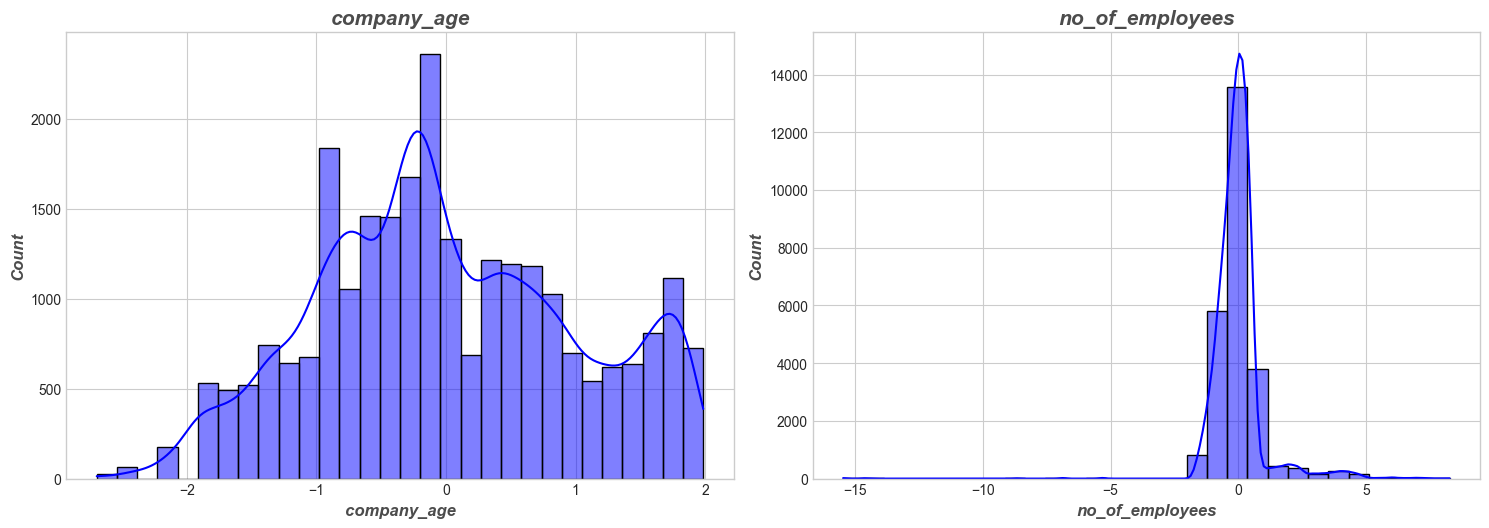

In [106]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(x_copy[col], kde=True, color='blue', bins=30)
    plt.title(col, fontsize=15, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
    plt.xlabel(col, fontsize=12, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
    plt.ylabel('Count', fontsize=12, fontweight='bold', color='black', loc='center', alpha=0.7, style='italic')
    plt.tight_layout()

<Axes: xlabel='prevailing_wage', ylabel='Count'>

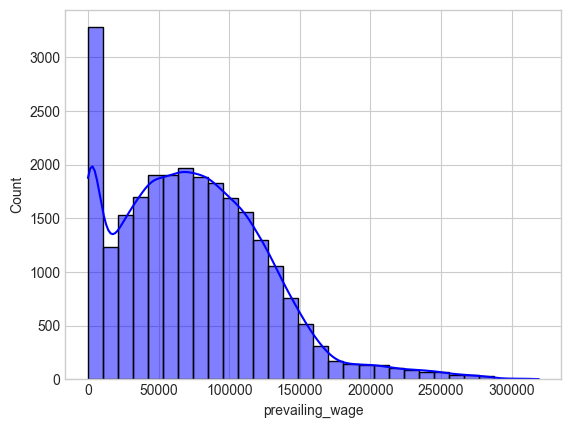

In [107]:
sns.histplot(x['prevailing_wage'], kde=True, color='blue', bins=30)

In [108]:
x_copy.skew(axis=0, skipna=True)

company_age        0.112260
no_of_employees    0.399339
dtype: float64

In [109]:
import pickle 

with open('skewness_corrector_model.pkl', 'wb') as file:
    pickle.dump(pt, file)

In [111]:
for feature in categorical_features:
    if feature == 'case_status':
        pass
    else:
        print(feature, ':', x[feature].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2


In [125]:
for col in x.columns:
    print(col, 'has unique values ', x[col].nunique(), 'and of dtype ', x[col].dtype)

continent has unique values  6 and of dtype  object
education_of_employee has unique values  4 and of dtype  object
has_job_experience has unique values  2 and of dtype  object
requires_job_training has unique values  2 and of dtype  object
no_of_employees has unique values  7105 and of dtype  int64
region_of_employment has unique values  5 and of dtype  object
prevailing_wage has unique values  25454 and of dtype  float64
unit_of_wage has unique values  4 and of dtype  object
full_time_position has unique values  2 and of dtype  object
company_age has unique values  199 and of dtype  int64


In [118]:
df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [112]:
num_features = [feature for feature in x.columns if x[feature].dtypes != 'O']
cat_features = [feature for feature in x.columns if x[feature].dtypes == 'O']

print('Numerical Features: \n', num_features, '\n', len(num_features))
print()
print('Categorical Features: \n', cat_features, '\n', len(cat_features))

Numerical Features: 
 ['no_of_employees', 'prevailing_wage', 'company_age'] 
 3

Categorical Features: 
 ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position'] 
 7


In [144]:
ordinal_columns = ['education_of_employee', 'has_job_experience', 'requires_job_training', 'full_time_position']
onehot_columns = ['region_of_employment', 'continent', 'unit_of_wage']
transform_columns = ['no_of_employees', 'company_age']
num_features = [feature for feature in x.columns if x[feature].dtypes != 'O']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = StandardScaler()
onehot_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transformer_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(transformers=[
    ("OneHotEncoder", onehot_transformer, onehot_columns),
    ("OrdinalEncoder", ordinal_encoder, ordinal_columns),
    ("Transformer", transformer_pipe, transform_columns),
    ("StandardScaler", num_transformer, num_features)
])

In [133]:
x = preprocessor.fit_transform(x)

In [135]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.517300,-0.955551,0.386667,-0.651230
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,3.0,1.0,0.0,1.0,0.030912,-0.467001,-0.142282,-0.533211
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,2.885076,-1.078363,1.694984,-0.674834
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-1.343550,1.630914,-0.243429,1.945186
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,1.0,0.0,1.0,-0.432287,-0.738126,-0.200417,-0.604022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.079917,-1.078363,-0.134020,-0.674834
25476,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,2.0,1.0,0.0,1.0,0.235747,-0.842544,-0.104603,-0.627626
25477,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,3.0,1.0,0.0,0.0,-0.413885,1.550209,-0.198713,1.638337
25478,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,3.0,1.0,1.0,1.0,-0.111949,1.684739,-0.163875,2.181224


In [136]:
x.shape

(25480, 23)

In [137]:
y.shape

(25480,)

In [138]:
from imblearn.combine import SMOTETomek, SMOTEENN

smt = SMOTETomek(random_state=42, sampling_strategy='minority')
x_new, y_new = smt.fit_resample(x, y)

In [139]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

In [141]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23984, 23)
(5996, 23)
(23984,)
(5996,)


In [149]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


def evaluate_clf(true, predicted):
  acc = accuracy_score(true, predicted)
  prec = precision_score(true, predicted)
  rec = recall_score(true, predicted)
  f1 = f1_score(true, predicted)
  roc_score = roc_auc_score(true, predicted)
  class_report = classification_report(true, predicted)
  conf_matrix = confusion_matrix(true, predicted)
  roc_cur = roc_curve(true, predicted)
  return acc, prec, rec, f1, roc_score, class_report, conf_matrix, roc_cur


models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False),
    "XGBoost": XGBClassifier(),
    "SVC": SVC(),
    "AdaBoost": AdaBoostClassifier()
}

def evaluate_models(x_train, x_test, y_train, y_test, models):
  models_list = []
  accuracy_list = []
  precision_list = []
  recall_list = []
  f1_list = []
  roc_list = []

  for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    model_train_acc, model_train_prec, model_train_rec, model_train_f1, model_train_roc, model_train_class_report, model_train_conf_matrix, model_train_roc_cur = evaluate_clf(y_train, y_train_pred)
    model_test_acc, model_test_prec, model_test_rec, model_test_f1, model_test_roc, model_test_class_report, model_test_conf_matrix, model_test_roc_cur = evaluate_clf(y_test, y_test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_acc))
    print('- Precision: {:.4f}'.format(model_train_prec))
    print('- Recall: {:.4f}'.format(model_train_rec))
    print('- F1 Score: {:.4f}'.format(model_train_f1))
    print('- ROC AUC Score: {:.4f}'.format(model_train_roc))
    print(f'- Classification Report \n {model_train_class_report}')
    print(f'- Confusion Matrix \n {model_train_conf_matrix}')
    print(f'- ROC Curve \n {model_train_roc_cur}')
    print('----------------------------------')
    print()

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_acc))
    accuracy_list.append(model_test_acc)
    print('- Precision: {:.4f}'.format(model_test_prec))
    precision_list.append(model_test_prec)
    print('- Recall: {:.4f}'.format(model_test_rec))
    recall_list.append(model_test_rec)
    print('- F1 Score: {:.4f}'.format(model_test_f1))
    f1_list.append(model_test_f1)
    print('- ROC AUC Score: {:.4f}'.format(model_test_roc))
    roc_list.append(model_test_roc)
    print(f'- Classification Report \n {model_test_class_report}')
    print(f'- Confusion Matrix \n {model_test_conf_matrix}')
    print(f'- ROC Curve \n {model_test_roc_cur}')
    print('='*35)
    print('\n')

  report = pd.DataFrame(list(zip(models_list, accuracy_list, precision_list, recall_list, f1_list, roc_list)), columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])
  
  return report



In [150]:
model_report = evaluate_models(x_train, x_test, y_train, y_test, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- Precision: 1.0000
- Recall: 0.9998
- F1 Score: 0.9999
- ROC AUC Score: 0.9999
- Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11979
           1       1.00      1.00      1.00     12005

    accuracy                           1.00     23984
   macro avg       1.00      1.00      1.00     23984
weighted avg       1.00      1.00      1.00     23984

- Confusion Matrix 
 [[11979     0]
 [    2 12003]]
- ROC Curve 
 (array([0., 0., 1.]), array([0.       , 0.9998334, 1.       ]), array([inf,  1.,  0.]))
----------------------------------

Model performance for Test set
- Accuracy: 0.8267
- Precision: 0.8402
- Recall: 0.8050
- F1 Score: 0.8222
- ROC AUC Score: 0.8266
- Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      3011
           1       0.84      0.81      0.82 

In [151]:
model_report.sort_values(by='Accuracy', ascending=False)

,Model Name,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Random Forest,0.826718,0.840210,0.805025,0.822241,0.826624
5,CatBoost,0.816878,0.798860,0.844891,0.821231,0.816999
6,XGBoost,0.804036,0.795945,0.815410,0.805560,0.804085
4,K-Nearest Neighbors,0.776684,0.805948,0.726298,0.764053,0.776467
2,Gradient Boosting,0.769346,0.763834,0.776884,0.770304,0.769379
1,Decision Tree,0.766511,0.771126,0.755109,0.763033,0.766462
7,SVC,0.744496,0.734430,0.762479,0.748192,0.744574
8,AdaBoost,0.741828,0.734268,0.754439,0.744217,0.741882
3,Logistic Regression,0.646264,0.637580,0.670687,0.653714,0.646370
